In [20]:
import librosa
import IPython.display as ipd
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import time
#import an audio wav
Data, fs = librosa.load('C:/Users/Abdelouahab/Downloads/female/en-0532.wav')

In [21]:
#play your imported audio --numpy
def playaudio(audio,freqns):
    sd.play(audio, freqns)
    sd.wait()
playaudio(Data,fs)

In [3]:
#save a recorded audio --numpy 
def SaveRecord(recording:np.ndarray,fs: int):
    write('sounds/audio'+ str(int(time.time())) +'.wav', fs, recording)

In [14]:
#this function takes an numpy audio and return the spectral properties below
def spectral_properties(y: np.ndarray, fs: int) -> dict:
    spec = np.abs(np.fft.rfft(y))
    freq = np.fft.rfftfreq(len(y), d=1/fs)
    spec = np.abs(spec)
    amp = spec / spec.sum()
    mean = (freq * amp).sum()
    sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
    amp_cumsum = np.cumsum(amp)
    median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
    mode = freq[amp.argmax()]
    Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
    Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
    IQR = Q75 - Q25
    z = amp - amp.mean()
    w = amp.std()
    skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
    kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4
    result_d = {
        'meanfreq': mean,
        'sd': sd,
        'median': median,
        'Q25': Q25,
        'Q75': Q75,
        'IQR': IQR,
        'skew': skew,
        'kurt': kurt,
        'mode': mode
    }
    return result_d

In [8]:
spectral_properties(Data,fs)

{'meanfreq': 1075.5447081857767,
 'sd': 919.7310898835849,
 'median': 722.8773773156379,
 'Q25': 404.6385319236937,
 'Q75': 1514.5545050176688,
 'IQR': 1109.915973093975,
 'skew': 4.205775251095901,
 'kurt': 26.069438926838146,
 'mode': 450.2383664821171}

In [6]:
duration = 5 #audion lenght
fs = 48000 #frequence
channels = 2 #how many voice input on your pc
# record your own audio
recorded = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
sd.wait()
Datame= recorded

In [7]:
SaveRecord(recorded, fs)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')
Data Frame Shape: (2793, 10)
female    582
male      582
Name: 10, dtype: int64
                1            2            3           4           5  \
961   2459.470024  2781.538303   911.135693  342.920354  362.094395   
1293  3329.884549  3445.307345  1699.159021  211.391437  421.636086   
1078  3185.893564  3766.270485  1620.039683  402.777778  391.865079   
445   2871.077683  2677.708407  2455.592105  226.151316  336.348684   
1779  1192.781526  1061.527856   971.278317  215.614887  429.611650   
447   2699.679776  3338.123555   970.665172  265.881913  351.270553   
2182  2215.161264  2714.695801   996.556474  498.278237  523.760331   
781   1079.257703  1839.591857   424.722222  126.388889  229.722222   
441   1716.331225  2572.565605   608.084046  109.864672  388.176638   
1782  3629.203030  3710.818726  2441.373125  309.768428  651.581866   

                6            7          8           9      10  

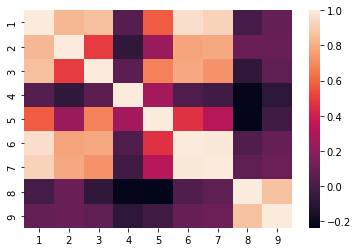

             1         2         3         4         5         6         7  \
961   0.210652  0.326046  0.091414  0.088655  0.057395  0.289806  0.334550   
1293  0.309268  0.445494  0.183870  0.051654  0.068758  0.397002  0.459384   
1078  0.292954  0.503253  0.174587  0.105494  0.063076  0.318855  0.367160   
445   0.257286  0.307361  0.272620  0.055806  0.052482  0.380516  0.446991   
1779  0.067139  0.016521  0.098470  0.052842  0.070280  0.091425  0.087642   
...        ...       ...       ...       ...       ...       ...       ...   
2774  0.202823  0.466578  0.054118  0.018140  0.036004  0.186397  0.219014   
2701  0.138228  0.271069  0.075682  0.124269  0.070804  0.127484  0.131179   
2773  0.093110  0.108854  0.072575  0.116386  0.073691  0.116118  0.116025   
2771  0.086299  0.146333  0.041523  0.022351  0.037641  0.103590  0.117704   
2751  0.094184  0.098526  0.076059  0.083159  0.065792  0.122709  0.127729   

             8         9  
961   0.081810  0.009430  
1293  0.1

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
def NormalizeData(Data,Max,Min):
        return (Data - Min )/ (Max - Min)
def Main():
    VoiceDataSet = pd.read_csv("C:/Users/Abdelouahab/Documents/M&M/out27.csv")
    # Print head
    VoiceDataSet = VoiceDataSet.drop(['Unnamed: 0'], axis=1)
#     print(VoiceDataSet.head())
    
    
    # nbr of clumns
    print(VoiceDataSet.columns)
    # change colomn data type
    for i in range(len(VoiceDataSet.columns)-1):
        VoiceDataSet.astype({VoiceDataSet.columns[i]: 'int32'}).dtypes
    # shuffle data for more training compatibilty
#     VoiceDataSet = VoiceDataSet.reindex(np.random.permutation(VoiceDataSet.index))
    
    #dataframe shape
    print("Data Frame Shape:",VoiceDataSet.shape)
    
    VoiceDataSet = VoiceDataSet[VoiceDataSet["10"] != "other"]
    VoiceDataSet=VoiceDataSet.sort_values(by=['10'])
    #counting values male and female
    VoiceDataSet = VoiceDataSet[0:1164]
    print(VoiceDataSet["10"].value_counts())
    
    print(VoiceDataSet.head(10))

    #show the Relations between attributes
    correlation = VoiceDataSet.corr()
    sns.heatmap(correlation)
    plt.show()
    
    
    # extract attributes
    
    X_ = VoiceDataSet.drop(['10'], axis=1)
    Xnorm=np.zeros(len(X_))
    from sklearn.preprocessing import normalize
    for i in range(9):
        X_[X_.columns[i]] = NormalizeData(X_[X_.columns[i]],max(X_[X_.columns[i]]),min(X_[X_.columns[i]]))
#         print(arr1)
#         Xnorm = np.c_[Xnorm, arr1]
    print(X_)
    # extract Labeles/targets
    Y_ = VoiceDataSet['10']
    
    #split data 
    X_train , X_test , y_train , y_test = train_test_split(X_,Y_, test_size=0.7)
    
    # initualize random forest algo
    Model = RandomForestClassifier(random_state=0)

    Model.fit(X_train,y_train)
    
    # Print the model score
    print(Model.score(X_test,y_test))
     
    return Model
Model = Main()

In [24]:
procceddata = spectral_properties(Data,fs)
sd.play(Data, fs)
sd.wait()
# print(procceddata)
Xpred = pd.DataFrame(procceddata,index=[0])
Xpred.head()
Model.predict(Xpred)


C:\Users\Abdelouahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- IQR
- Q25
- Q75
- kurt
- meanfreq
- ...
Feature names seen at fit time, yet now missing:
- 1
- 2
- 3
- 4
- 5
- ...

  warnings.warn(message, FutureWarning)


array(['male'], dtype=object)